(sec:finite-diff)=
# Finite Difference Methods

## Two-points methods

First, we look at the mathematical definition of derivative:

$$
\frac{d}{dx} f(x) = \lim_{h \searrow 0} \frac{f(x+h)-f(x)}{h} = \lim_{h \searrow 0} \frac{f(x)-f(x-h)}{h}
$$

The mathematical procedure of limit operation $h \searrow 0$ requires that $h$ continuously approaches 0 from the positive side.  However, floating point numbers are discrete and infinitesimally small number is not available . If the smallest value, $h=0$, is used, we have $0/0$ and thus the derivative is `nan`.  If the next smallest number, `realmin` (see Section {numref}`sec-floating-point`)  is used, the numerator $f(x+h)-f(x)$ is very inaccurate due to the roundoff error discussed in Section {numref}`sec-digitization-errors`. The last resort is to use $1 \gg h > $ `realmin`, which avoid the roundoff error. However, the ration of the numerator and denominator is not exactly the above limit, hence the result is deviated from the actual derivative.  In fact, the exact derivative cannot be obtained from any finite value of $h$.  Nevertheless, we hope that there exists $h$ small enough to get the approximated limit but large enough to avoid the roundoff error. Such approximation is known as [finite difference method](https://en.wikipedia.org/wiki/Finite_difference_method).

There is another issue with the use of a finite $h$.  The two limits in the above definition do not agree. See Fig. {numref}`fig-diff`.  There are two candidates of numerical derivative, the *forward finite difference* method

$$
\frac{d}{dx} f(x) \approx \Delta_\text{f}^{h} f(x)  \equiv \displaystyle \frac{f(x+h)-f(x)}{h}
$$

and the *backward finite difference* method

$$
\frac{d}{dx} f(x) \approx \Delta_\text{b}^{h} f(x) \equiv \displaystyle \frac{f(x)-f(x-h)}{h}.
$$

Notice that there is no limit operation. We shall call $\Delta_\text{f}^{h}$ and $\Delta_\text{b}^{h}$ forward and backward finite difference operators, which depend on the value of $h$. Unlike the exact derivative the forward and backward finite difference methods do not agree each other due to the finite $h$. As illustrated in Fig. {numref}`fig-diff`, one of them overestimates and the other underestimates.  

```{figure} diff.png
---
name: fig-diff
---
Illustration of various numerical derivatives.  The exact derivative is the slope of the curve (black line) at $x$, which is shown as the dotted line. The forward finite difference method shown in green underestimates the slop whereas the backward finite difference method shown in blue overestimates it.  The mean finite different method shown in red looks very close to the exact derivative.
```

Now, we investigate how accurate the forward and backward finite difference methods are. We estimate the order of error using Taylor expansion{cite}`Boas2006`:

$$
f(x+h) = f(x) + h\, f'(x) + \frac{h^2}{2} f''(x) + \frac{h^3}{3!} f^{(3)}(x) + \mathcal{O}(h^4)
$$

$$
f(x-h) = f(x) - h\, f'(x) + \frac{h^2}{2} f''(x) - \frac{h^3}{3!} f^{(3)}(x) + \mathcal{O}(h^4)
$$

where $f'$ and $f''$ indicate the first and second order derivatives of $f$ and $\mathcal{O}(h^4)$ the remaining terms with $h^4$ and higher order.

Substituting the expansions  to the definition of the finite difference methods, we find

$$
    \Delta_\text{f} f(x) =  f'(x) + \frac{h}{2} f''(x) + \mathcal{O}(h^2)
$$

$$
    \Delta_\text{b} f(x) =  f'(x) - \frac{h}{2} f''(x) + \mathcal{O}(h^2)
$$

The leading term in the error $ \Delta_\text{f,f} f(x) - f'(x)$ is $\pm  \frac{h}{2} f''(x)$, which is the order of $h$. This means that if $h$ is small enough, the numerical methods agree with the exact derivative. However, the error decreases only linearly with $h$.  We need to remember that if $h$ is too small, the roundoff error kills the accuracy.  Hence, $h$ cannot be too small.  Error at the order $h$ is in general not acceptable and these methods are not accurate enough for practical applications.

There is a better method.  Noting that the error in the forward and backward finite difference method is exactly the same in magnitude but has opposite sign, we can get rid of the error at the order of $h$.
Taking the mean of the two approximations, we obtain *mean finite difference method*:

$$
\Delta_\text{m} f(x) \equiv \frac{\Delta_\text{F} f(x)+\Delta_\text{B} f(x)}{2} = \displaystyle\frac{f(x+h)-f(x-h)}{2h} = f'(x) + \frac{h^2}{3!} f^{(3)}(x) + \mathcal{O}(h^4)
$$(eq_mean_diff)

where $f^{(3)}$ is the third order derivative.    Notice that the leading error is the order of $h^2$.  Since $h \ll 1$, $h^2 \ll h$ and thus the mean finite difference method is more accurate than the forward and backward finite difference methods. The improvement is clearly visible in Fig. {numref}`fig-diff`.

Mathematically speaking, the small error in the mean finite difference method is related to the [mean value theorem](https://en.wikipedia.org/wiki/Mean_value_theorem) which states that there is at least one number $c$ between $a$ and $b$ such that
$f'(c)=\displaystyle\frac{f(b)-f(a)}{b-a}$.
Let $b=x+h$ and $a=x-h$. The mean finite different method gives the slope of the curve at some point $c$ between $x+h$ and $x-h$.  When $h$ is small, $c$ is apprximately $x$.  Then, we obtain the mean finite difference method.

```{admonition} Method 2.1.1: Two-point finite difference method

$$
\frac{df}{dx} = \frac{f(x+h)-f(x-h)}{2h} + \mathcal{O}(h^2)
$$

```

How do we find an appropriate value of $h$?
As we are repeatedly warned that when $h$ is too small, the finite different methods suffer from the round-off error.  Therefore, we must choose the value of $h$  carefully, not too big and not too small. Noting that $x+h = x (1+h/x)$, it is pointless to use $h/x < \epsilon$ where $\epsilon$ is the machine epsilon. (See Section {numref}`sec-floating-point`.)
The following example illustrates that the finite difference method fails when $h$ is too small. 


---

**Example 2.1.1**: Accuracy of two-points methods

Let's numerically evaluate the derivative of $f(x)=\displaystyle\frac{1}{3}x^3$ at $x=1$ and compare the results with the exact value.
The analytic form of derivative is $f'(x)=x^2$ and thus the exact value is $f'(1)=1$.  The following code computes the derivative using the forward, backward and mean finite difference methods for
$h=1, 0.1, 0.01, \cdots, 10^{-19}$.  The absolute error is measured by $\delta = |f'(1)-\Delta f(1)|$. 


In [1]:
# we use numpy array 
import numpy as np

# define function f(x)=x^3/3 before computation begins
def func(x):
    return x**3/3

# computation starts here

# set a spoint where the dreivative is computed
x=1.0

# 20 different values of h are considered
imax=20

# define h as a numpy array
h=np.zeros(imax)

# d_f = forward finite difference 
d_f=np.zeros(imax)

# d_b = backwaord finite difference
d_b=np.zeros(imax)

# d_m = mean value finite difference
d_m=np.zeros(imax)

# errors in each method
err_f=np.zeros(imax)
err_b=np.zeros(imax)
err_m=np.zeros(imax)

# header for table output
print("{0:^62}".format('Absolute Errors'))
print("{0:^6} {1:^18} {2:^18} {3:^20}".format('h','forward','backward','mean value'))

# reset the counter i and start iteration
i=0
while(i<imax):
    
    # define displacement h
    h[i]=10**(-i)
    
    # evaluation of numerical derivative
    d_f[i]=(func(x+h[i])-func(x))/h[i] # Forward diffrence
    d_b[i]=(func(x)-func(x-h[i]))/h[i] # Backward diffrence
    d_m[i]=(func(x+h[i])-func(x-h[i]))/(2*h[i]) # Mean value

    # Errors
    err_f[i]=abs(1.-d_f[i])
    err_b[i]=abs(1.-d_b[i])
    err_m[i]=abs(1.-d_m[i])
    
    # print out the results
    print("{0:6.1e} {1:18.10e} {2:18.10e} {3:18.10e}"
              .format(h[i],err_f[i],err_b[i],err_m[i]))
    
    # increment the counter
    i=i+1



                       Absolute Errors                        
  h         forward            backward           mean value     
1.0e+00   1.3333333333e+00   6.6666666667e-01   3.3333333333e-01
1.0e-01   1.0333333333e-01   9.6666666667e-02   3.3333333333e-03
1.0e-02   1.0033333333e-02   9.9666666667e-03   3.3333333333e-05
1.0e-03   1.0003333333e-03   9.9966666667e-04   3.3333330629e-07
1.0e-04   1.0000333328e-04   9.9996666613e-05   3.3333344973e-09
1.0e-05   1.0000040685e-05   9.9999720719e-06   3.4306779639e-11
1.0e-06   9.9995112279e-07   1.0000046338e-06   2.6755486715e-11
1.0e-07   1.0050393939e-07   1.0044642806e-07   2.8755664516e-11
1.0e-08   5.0247592753e-09   6.0774709709e-09   5.2635584780e-10
1.0e-09   8.2740370999e-08   2.8281931574e-08   2.7229219768e-08
1.0e-10   8.2740370999e-08   8.2740370999e-08   8.2740370999e-08
1.0e-11   8.2740370999e-08   8.2740370999e-08   8.2740370999e-08
1.0e-12   8.8900582341e-05   2.2121720122e-05   3.3389431110e-05
1.0e-13   7.9927783736e-04

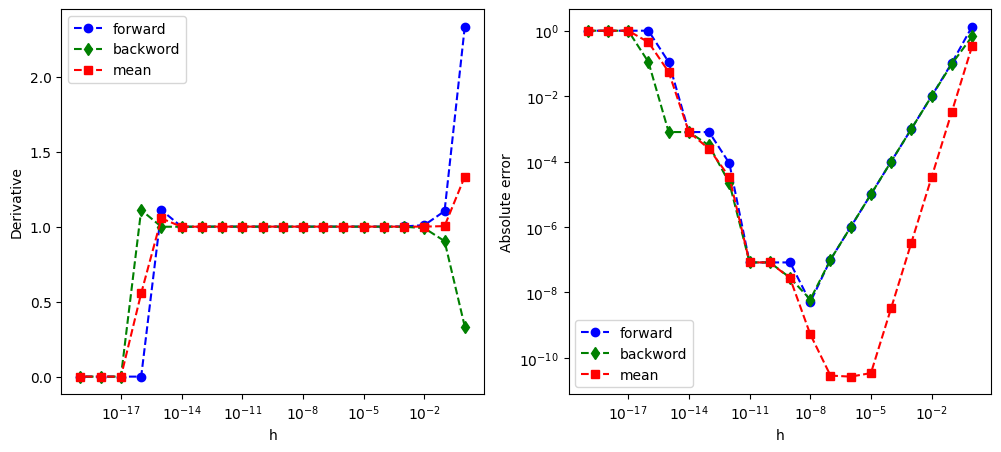

In [2]:
# continued from the previous code block
# plot the above data

import matplotlib.pyplot as plt
plt.ioff()
plt.figure(figsize=(12,5))

# plot of the derivatives
plt.subplot(1,2,1)
plt.semilogx(h,d_f, '--ob', label='forward')
plt.semilogx(h,d_b, '--dg', label='backword')
plt.semilogx(h,d_m, '--sr', label='mean')
plt.legend(loc=2)
plt.xlabel('h')
plt.ylabel('Derivative')

# plot of the absolute errors
plt.subplot(1,2,2)
plt.loglog(h,err_f, '--ob', label='forward')
plt.loglog(h,err_b, '--dg', label='backword')
plt.loglog(h,err_m, '--sr', label='mean')
plt.legend(loc=3)
plt.xlabel('h')
plt.ylabel('Absolute error')
plt.show()

The error in forward and backward methods is almost the same and decreases in the same way as $h$.  However, the improvement stop at $h \sim 10^{-8}$ and the error increases for smaller $h$ due to the round-off error. The best answer is obtained with $h=10^{-8}$. The mean difference method shows much better result.  The error decreases with $h^2$.  The best value is obtained at $h=10^{-5}$ and the result is better than the best value obtained by the forward or backward method.  It is quite clear that the mean difference method is much better than the two others.  When $h$ hits the machine epsilon $\epsilon \approx 2 \times 10^{-16}$, the finite difference vanishes completely.

## Four-point method

The derivative corresponds to the slope of a curve at a given point.  To obtain the slope, we need to evalaute at least the function at two different points.  The two-point method approximates the curve with a straight line by evaluating the function at two points.  If we have more information about the curve, we should be able to get more accurate derivative.   The fllowing symmetric four-point is commonly used. Its error is at the order of $h^4$, much better than the mean finite difference method.{cite}`Zwillinger2012`

```{admonition} Method 2.1.2:  Four-point finite difference method

$$
\frac{df}{dx} = \displaystyle\frac{f(x+2h)- 8 f(x+h) + 8 f(x-h) -f(x-2h)}{12h} + \mathcal{O}(h^4)
$$

```

> *Exercise*:  Verify that the order of error is $h^4$ using the Taylor expansions.


---
Last modified on 2/14/2024 by R. Kawai